In [5]:
from pynq import Overlay

# Load your overlay
overlay = Overlay("design_1_wrapper.bit")

# Access the IP block
conv_ip = overlay.conv2d_edge_0  # Replace with actual IP name if different

# Print register details
if hasattr(conv_ip, 'register_map'):
    for reg_name in conv_ip.register_map:
        reg_obj = conv_ip.register_map[reg_name]
        reg_address = reg_obj.address_offset
        print(f"Register: {reg_name}, Address Offset: {reg_address:#010x}")
else:
    print("register_map is not available for this IP.")


TypeError: 'RegisterMapconv2d_edge_0' object is not iterable

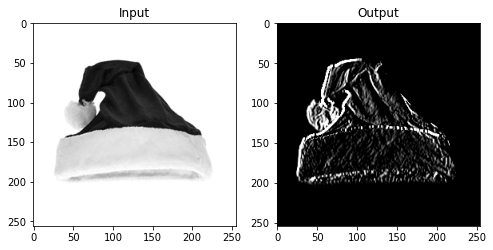

Processed foto1.png → saved output. Processing time: 0.0009 seconds


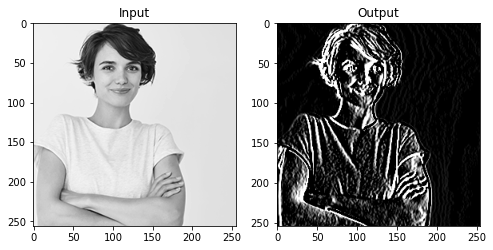

Processed foto3.png → saved output. Processing time: 0.0009 seconds


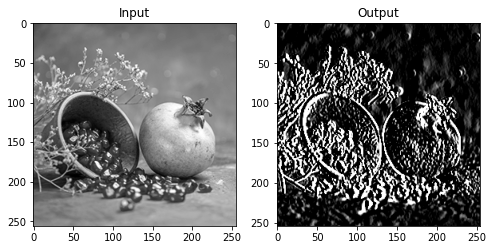

Processed foto0.png → saved output. Processing time: 0.0009 seconds


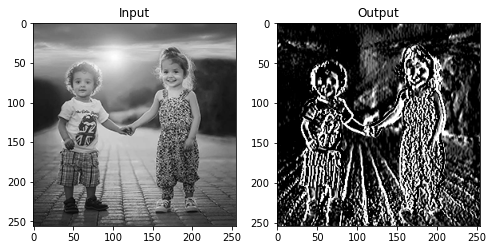

Processed foto2.png → saved output. Processing time: 0.0009 seconds


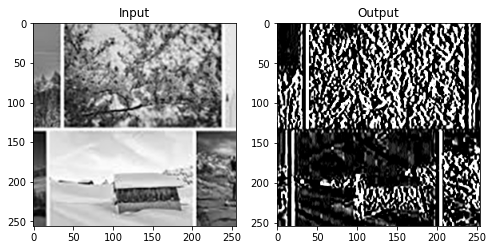

Processed foto4.png → saved output. Processing time: 0.0008 seconds


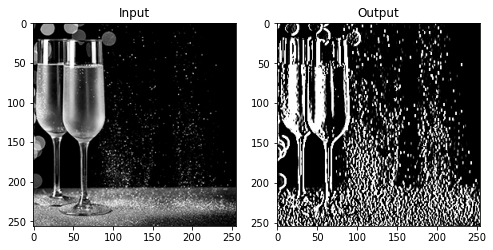

Processed foto9.png → saved output. Processing time: 0.0010 seconds


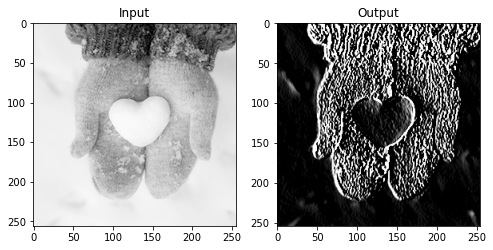

Processed foto8.png → saved output. Processing time: 0.0009 seconds


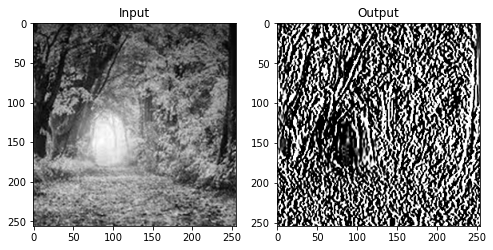

Processed foto6.png → saved output. Processing time: 0.0009 seconds


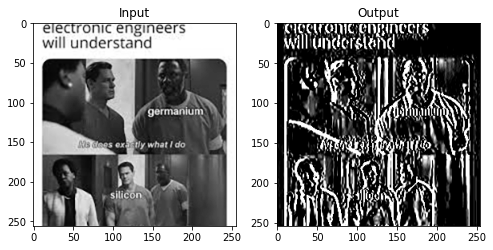

Processed foto7.png → saved output. Processing time: 0.0009 seconds


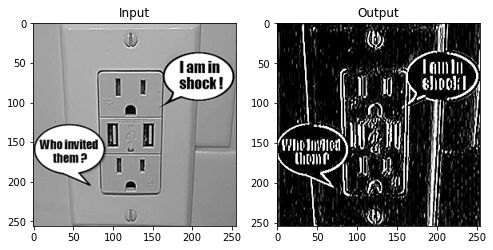

Processed foto5.png → saved output. Processing time: 0.0009 seconds


In [2]:
from pynq import Overlay
from pynq import allocate
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import time

# Load bitstream
overlay = Overlay("design_1_wrapper.bit")
conv_ip = overlay.conv2d_edge_0  # Replace with actual IP name if different

# Directories
input_dir = "/home/xilinx/jupyter_notebooks/pictures_input"
output_dir = "/home/xilinx/jupyter_notebooks/outputs"
os.makedirs(output_dir, exist_ok=True)

# Image dimensions
IMG_HEIGHT = 256
IMG_WIDTH = 256

# Helper: write 64-bit address into two 32-bit registers
def write_addr(ip, reg_low, reg_high, addr):
    setattr(ip.register_map, reg_low, addr & 0xFFFFFFFF)
    setattr(ip.register_map, reg_high, (addr >> 32) & 0xFFFFFFFF)

# Process each image
for img_name in os.listdir(input_dir):
    if not img_name.lower().endswith((".png", ".jpg", ".bmp")):
        continue

    # Load and preprocess image
    img_path = os.path.join(input_dir, img_name)
    img = Image.open(img_path).convert("L").resize((IMG_WIDTH, IMG_HEIGHT))
    img_array = np.array(img).astype(np.uint8)

    # Allocate buffers
    in_buffer = allocate(shape=(IMG_HEIGHT, IMG_WIDTH), dtype=np.uint8)
    out_buffer = allocate(shape=(IMG_HEIGHT - 2, IMG_WIDTH - 2), dtype=np.uint8)

    np.copyto(in_buffer, img_array)

    # Write input/output addresses
    write_addr(conv_ip, "input_r_1", "input_r_2", in_buffer.physical_address)
    write_addr(conv_ip, "output_r_1", "output_r_2", out_buffer.physical_address)

    # Start IP and wait for completion
    start_time = time.time()
    conv_ip.register_map.CTRL.AP_START = 1
    while not conv_ip.register_map.CTRL.AP_DONE:
        pass
    elapsed = time.time() - start_time

    # Save and show results
    out_img = Image.fromarray(out_buffer)
    out_img.save(os.path.join(output_dir, f"output_{img_name}"))

    plt.figure(figsize=(8, 4))
    plt.subplot(1, 2, 1)
    plt.imshow(img_array, cmap='gray')
    plt.title("Input")

    plt.subplot(1, 2, 2)
    plt.imshow(out_buffer, cmap='gray')
    plt.title("Output")
    plt.show()

    print(f"Processed {img_name} → saved output. Processing time: {elapsed:.4f} seconds")

    # Optional: Free buffers
    in_buffer.freebuffer()
    out_buffer.freebuffer()



In [2]:
print(conv_ip.register_map)

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  input_r_1 = Register(input_r=write-only),
  input_r_2 = Register(input_r=write-only),
  output_r_1 = Register(output_r=write-only),
  output_r_2 = Register(output_r=write-only)
}


TypeError: 'RegisterMapconv2d_edge_0' object is not iterable

In [10]:
from pynq import Overlay
from pynq import allocate


# Load bitstream
overlay = Overlay("design_1_wrapper.bit")
conv_ip = overlay.conv2d_edge_0 
print(conv_ip.register_map)

RegisterMap {
  CTRL = Register(AP_START=0, AP_DONE=0, AP_IDLE=1, AP_READY=0, RESERVED_1=0, AUTO_RESTART=0, RESERVED_2=0, INTERRUPT=0, RESERVED_3=0),
  GIER = Register(Enable=0, RESERVED=0),
  IP_IER = Register(CHAN0_INT_EN=0, CHAN1_INT_EN=0, RESERVED_0=0),
  IP_ISR = Register(CHAN0_INT_ST=0, CHAN1_INT_ST=0, RESERVED_0=0),
  input_r_1 = Register(input_r=write-only),
  input_r_2 = Register(input_r=write-only),
  output_r_1 = Register(output_r=write-only),
  output_r_2 = Register(output_r=write-only)
}
